In [2]:
from tensorflow.keras.applications import mobilenet_v2
import tensorflow as tf
from tensorflow import keras
from keras.models import Input
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = mobilenet_v2.MobileNetV2(input_shape=(224,224,3), alpha=1.0,
 include_top=False, weights='imagenet')

In [4]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [5]:
model.trainable = False

In [6]:
model2=models.Sequential()
model2.add(model)
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='softmax'))

In [7]:
model_name = 'animals.h5'

In [10]:
optimizer=keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

checkpoint_cb=keras.callbacks.ModelCheckpoint(
    model_name,
    monitor='val_acc', verbose=1, save_best_only=True)

early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [9]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                627210    
Total params: 2,885,194
Trainable params: 627,210
Non-trainable params: 2,257,984
_________________________________________________________________


In [11]:
target_size = (224, 224)
batch_size = 100

file_path = 'C:/Users/LG/winter_term/transferLearning/archive_ani/raw-img'

data_generator = ImageDataGenerator(rescale=1/223,validation_split=0.25)
train_data = data_generator.flow_from_directory(file_path,
                                                subset = 'training', target_size = target_size, batch_size = batch_size,
                                                class_mode = 'categorical', color_mode = 'rgb')
val_data = data_generator.flow_from_directory(file_path,
                                               subset = 'validation', target_size = target_size, batch_size = batch_size,
                                               class_mode = 'categorical', color_mode = 'rgb')

Found 19638 images belonging to 10 classes.
Found 6541 images belonging to 10 classes.


In [12]:
for image_batch, label_batch in train_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (100, 224, 224, 3)
Label batch shape:  (100, 10)


In [53]:
train_data.classes

array([0, 0, 0, ..., 9, 9, 9])

In [22]:
animals=["dog", "horse","elephant", "butterfly",  "chicken",  "cat", "cow",  "sheep", "squirrel","spider"]

In [13]:
history=model2.fit(train_data,
                  epochs=10,
                  validation_data=val_data,
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
197/197 [==============================] - ETA: 0s - loss: 1.2183 - acc: 0.9067
Epoch 00001: val_acc improved from -inf to 0.93808, saving model to animals.h5
197/197 [==============================] - 1080s 5s/step - loss: 1.2183 - acc: 0.9067 - val_loss: 0.8211 - val_acc: 0.9381
Epoch 2/10
197/197 [==============================] - ETA: 0s - loss: 0.3451 - acc: 0.9688
Epoch 00002: val_acc improved from 0.93808 to 0.94603, saving model to animals.h5
197/197 [==============================] - 1142s 6s/step - loss: 0.3451 - acc: 0.9688 - val_loss: 0.8961 - val_acc: 0.9460
Epoch 3/10
197/197 [==============================] - ETA: 0s - loss: 0.1406 - acc: 0.9852
Epoch 00003: val_acc did not improve from 0.94603
197/197 [==============================] - 1155s 6s/step - loss: 0.1406 - acc: 0.9852 - val_loss: 1.2212 - val_acc: 0.9382
Epoch 4/10
197/197 [==============================] - ETA: 0s - loss: 0.1043 - acc: 0.9876
Epoch 00004: val_acc improved from 0.94603 to 0.94940, s

In [14]:
model2.save('animal_model.h5')

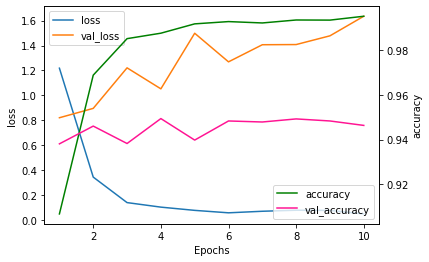

"\n\nplt.plot(range(1,epoch+1),history.history['loss'],label='loss')\nplt.plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')\nplt.plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')\nplt.plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')\nplt.legend()\nplt.show()\n"

In [30]:
epoch = len(history.history['val_loss'])

fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.plot(range(1,epoch+1),history.history['loss'],label='loss')
ax1.plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')

ax2 = ax1.twinx()
ax2.set_ylabel('accuracy')
ax2.plot(range(1,epoch+1),history.history['acc'],label='accuracy', color='green')
ax2.plot(range(1,epoch+1),history.history['val_acc'],label='val_accuracy', color='deeppink')

ax1.legend()
ax2.legend()

plt.show()

test

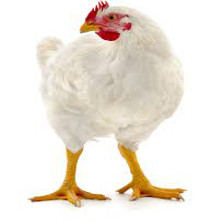

In [18]:
import numpy as np
import PIL.Image as Image

IMAGE_SHAPE = (224, 224)

test_img = Image.open('./anitest/8.jpg').resize(IMAGE_SHAPE)
test_img

In [19]:
test_img = np.array(test_img)/223
result = model2.predict(test_img[np.newaxis, ...])
predicted_class = np.argmax(result[0], axis=-1)

result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
predicted_class

4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


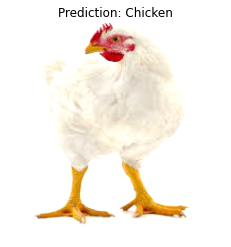

In [23]:
import matplotlib.pyplot as plt 

plt.imshow(test_img)
plt.axis('off')
predicted_class_name = animals[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())